In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os, json
%matplotlib inline

/Users/crankshaw/anaconda2/envs/clipper/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [73]:
def analyze_run(t):
    accs = []
    thrus = []
    mean_lats = []
    max_lats = []
    # throw out first trial to let things warm up
    for i in range(1, len(t)):
        sp = t[i].split(", ")
        accs.append(float(sp[0].split(": ")[1]))
        thrus.append(float(sp[1].split(": ")[1]))
        mean_lats.append(float(sp[2].split(": ")[1]))
        max_lats.append(float(sp[3].split(": ")[1]))
    acc_m, acc_err = np.mean(accs), np.std(accs)/(np.sqrt(len(t) - 1))
    thrus_m, thrus_err = np.mean(thrus), np.std(thrus)/(np.sqrt(len(t) - 1))
    mean_lats_m, mean_lats_err = np.mean(mean_lats), np.std(mean_lats)/(np.sqrt(len(t) - 1))
    max_lats_m, max_lats_err = np.mean(max_lats), np.std(max_lats)/(np.sqrt(len(t) - 1))
    return acc_m, acc_err, thrus_m, thrus_err, mean_lats_m, mean_lats_err, max_lats_m, max_lats_err

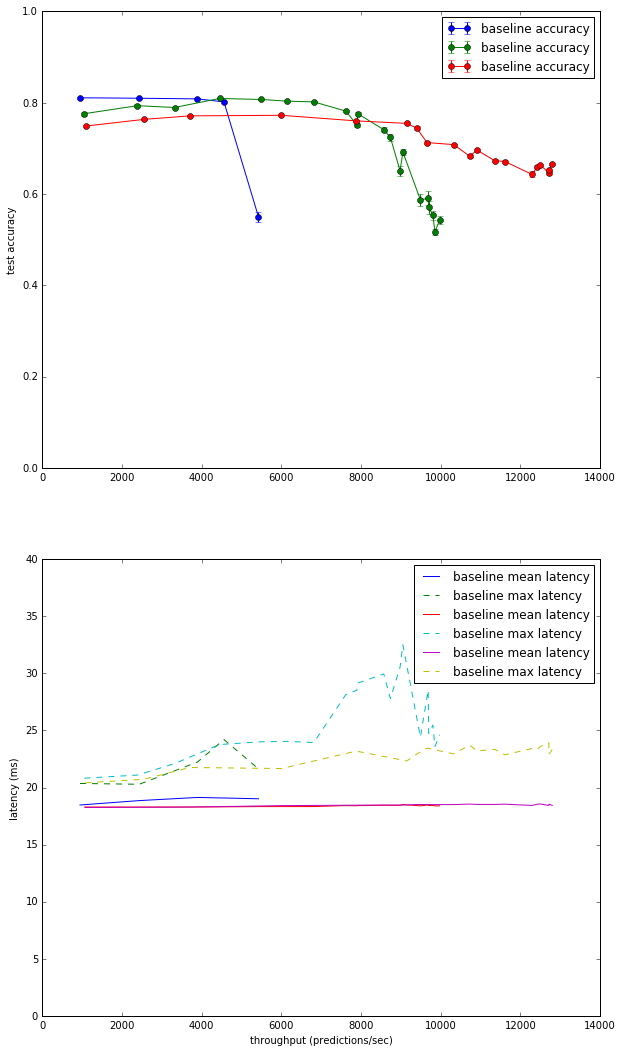

In [75]:
path = os.path.abspath("../clipper_server/experiments_RAW/end_to_end_THRUPUT")
res_files = ["baseline_CLEAN.txt", "batching_CLEAN.txt", "max_features_CLEAN.txt"]
plt.figure(figsize=(10,18))
for i in range(3):
    runs = []
    with open(os.path.join(path,res_files[i])) as rf:
        cur_exp = None
        for line in rf:
            if line.startswith("EXPERIMENT"):
                if cur_exp is not None:
                    runs.append(cur_exp)
                cur_exp = []
            elif line.startswith("ACC"):
                cur_exp.append(line.strip())




        #return np.mean(accs)


    acc_m, acc_err, thrus_m, thrus_err, mean_lats_m, mean_lats_err, max_lats_m, max_lats_err = zip(*[analyze_run(r) for r in runs])
    acc_m = np.array(acc_m)
    acc_err = np.array(acc_err)
    thrus_m = np.array(thrus_m)
    thrus_err = np.array(thrus_err)
    mean_lats_m = np.array(mean_lats_m)
    mean_lats_err = np.array(mean_lats_err)
    max_lats_m = np.array(max_lats_m)
    max_lats_err = np.array(max_lats_err)





    ts = np.array(np.argsort(thrus_m))

    ax_acc = plt.subplot(211)
    ax_acc.errorbar(thrus_m[ts], acc_m[ts], yerr=acc_err[ts], fmt="o-", label="baseline accuracy")

    ax_acc.set_ylabel("test accuracy")
    ax_acc.set_ylim((0.0, 1.0))
    ax_acc.legend()
    # for tl in ax_acc.get_yticklabels():
    #     tl.set_color('r')
    #ax_acc.legend(loc=0)

    ax_lat = plt.subplot(212, sharex=ax_acc)
    #ax_lat = ax_acc.twinx()
    ax_lat.plot(thrus_m[ts], mean_lats_m[ts], "-", label="baseline mean latency")
    ax_lat.plot(thrus_m[ts], max_lats_m[ts], "--", label="baseline max latency")
    ax_lat.set_ylabel("latency (ms)")
    ax_lat.set_xlabel("throughput (predictions/sec)")
    ax_lat.legend()

    ax_lat.set_ylim((0, 40))
#ax_lat.legend(loc=0)
# for tl in ax_lat.get_yticklabels():
#     tl.set_color('b')

#plt.set_size_inches(10,8)

plt.savefig("test.pdf")
plt.show()